In [204]:
words = open("names.txt").read().splitlines()

In [205]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [206]:
len(words)

32033

In [207]:
min(len(w) for w in words), max(len(w) for w in words)

(2, 15)

In [208]:
b = {}
for w in words: 
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [209]:
sorted(b.items(), key=lambda kv: -kv[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [210]:
import torch

In [211]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [212]:
chars = sorted(list(set("".join(words))))
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi["."] = 0 
itos = {i:s for s, i in stoi.items()}

In [213]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

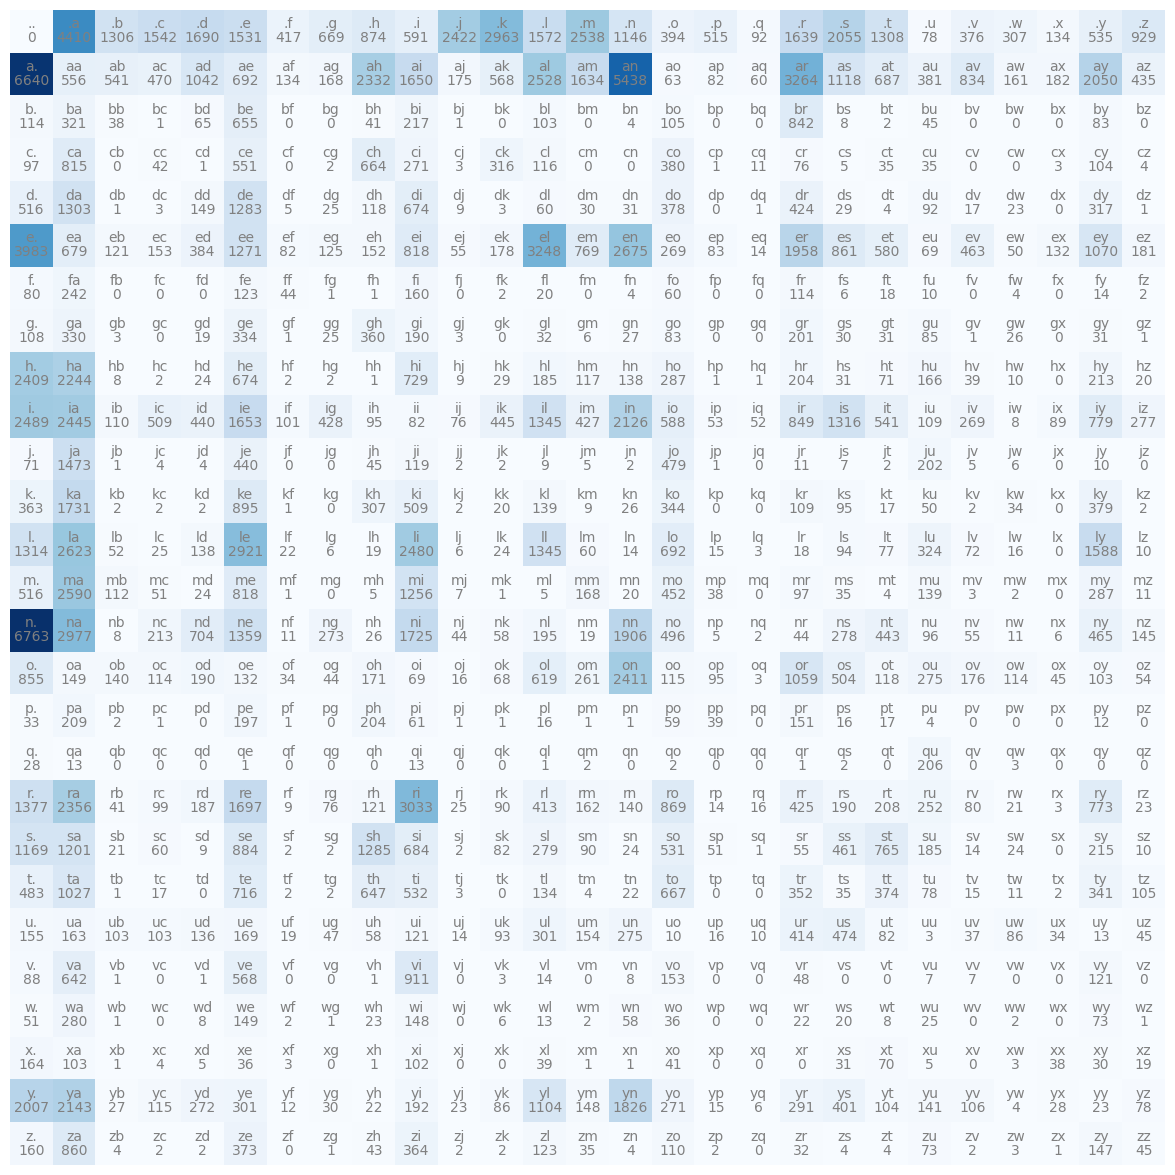

In [214]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 15))
plt.imshow(N, cmap="Blues")
for y in range(27):
    for x in range(27):
        plt.text(x, y, itos[y] + itos[x], ha="center", va="bottom", color="gray")
        plt.text(x, y, N[y, x].item(), ha="center", va="top", color="gray")
plt.axis("off");

In [215]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [216]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [217]:
p.shape

torch.Size([27])

In [218]:
g = torch.Generator().manual_seed(2**31 - 1)
idx = torch.multinomial(p, 1, True, generator=g).item()
itos[idx]

'j'

In [219]:
P = N.float() 
P /= P.sum(1, True)

In [ ]:
for _ in range(10):
    idx, out = 0, []
    while True:
        p = P[idx]
        idx = torch.multinomial(p, 1, True, generator=g).item()
        out.append(itos[idx])
        if idx == stoi["."]:
            break
    print("".join(out))

sonde.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
